# 사이킷런의 toy dataset을 활용한 분류 모델 만들기

1. Digits datasets : 손글씨 이미지 분류 (비정형 데이터, 다중분류 문제)
2. Wine datasets : 와인 분류(정형 데이터, 다중분류 문제)
3. Breast cancer datasets : 유방암 여부 진단(정형 데이터, 이중분류 문제)
---

In [1]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


# 손글씨 이미지 분류
- 비정형 데이터, 다중분류 문제
- load_digits : 손글씨 이미지 데이터 : [링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

## 1. 데이터 load 및 데이터 분석

우선 Digits dataset 데이터 확인해보자

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Dataset Description 주요항목은 다음과 같다 
- Number of Instances: 1797
- Number of Attributes: 64
- Attribute Information: 8x8 image of integer pixels in the range 0..16.
- Missing Attribute Values: None

각 항목을 따로 확인해보자

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [6]:
digits.images.shape

(1797, 8, 8)

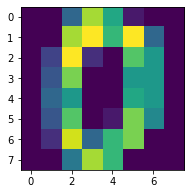

In [7]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[0])

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits.target.shape, digits.target

((1797,), array([0, 1, 2, ..., 8, 9, 8]))

이 데이터셋에는 누락된 정보는 없으며 손글씨 이미지를 분류하기위해 적절한 데이터가 제공되는것 같다.
- 총 이미지 갯수 : 1797장
- feature 정보  : 이미지에대한 64개 픽셀값 
- 샘플 이미지 사이즈 : 8x8 
- 클래스 라벨값 : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 
- 라벨 사이즈 : 1797

데이터의 불균형은 없는지 확인후에 학습을 시작해보자. 

In [10]:
value, counts = np.unique(digits.target, return_counts = True)
print(value)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[178 182 177 183 181 182 181 179 174 180]


각 손글씨 숫자마다 비슷한 양의 샘플이 있는 데이터셋으로 확인되었다. 
이 분류 문제의 경우 정확하게 손글씨를 판별하는 것이 중요할 것이므로 모델학습후 평가시 마다 따로 정확도를 저장해서 함께 비교해보도록 하자. 빅데이터를 학습하는것은 아니지만 추가적으로 모델 학습 시간도 함께 확인하면 좋을것 같다.

In [11]:
#정확도 저장 딕셔너리
dict_accuracy = {}

#학습시간 저장 딕셔너리
dict_time = {}

## 2. 데이터셋 분리 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size=0.2,
                                                   random_state=21)

print('X_train :', X_train.shape, 'y_train:', y_train.shape)
print('X_test :', X_test.shape, 'y_test:', y_test.shape)

X_train : (1437, 64) y_train: (1437,)
X_test : (360, 64) y_test: (360,)


학습용 데이터로 1437건, 테스트용 데이터로 360건의 데이터가 분리되었다.

## 3. Model 학습 및 평가

### 3-1 Decision Tree

In [13]:
#학습
model= DecisionTreeClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_accuracy['DecisionTreeClassifier'] = accuracy_score(y_test, y_pred) #정확도
dict_time['DecisionTreeClassifier'] = (end_time - start_time)*1000 #수행시간 (ms)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.72      0.81        36
           2       0.96      0.73      0.83        30
           3       0.74      0.83      0.78        41
           4       0.80      0.88      0.84        32
           5       0.90      0.93      0.91        46
           6       0.93      0.88      0.90        32
           7       0.90      0.93      0.91        40
           8       0.77      0.81      0.79        42
           9       0.69      0.76      0.72        29

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



### 3-2 Random Forest

In [14]:
#학습
model= RandomForestClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_accuracy['RandomForestClassifier'] = accuracy_score(y_test, y_pred) #정확도
dict_time['RandomForestClassifier'] = (end_time - start_time)*1000 #수행시간 (ms)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        30
           3       0.98      0.98      0.98        41
           4       0.94      0.97      0.95        32
           5       1.00      0.98      0.99        46
           6       1.00      0.97      0.98        32
           7       0.98      1.00      0.99        40
           8       0.93      0.98      0.95        42
           9       1.00      0.93      0.96        29

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



### 3-3 SVM

In [15]:
#학습
model= SVC(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_accuracy['SVM'] = accuracy_score(y_test, y_pred) #정확도
dict_time['SVM'] = (end_time - start_time)*1000 #수행시간 (ms)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.98        32
           5       0.98      1.00      0.99        46
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        40
           8       0.98      0.95      0.96        42
           9       1.00      0.93      0.96        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 3-4 SGD Classifier 

In [16]:
#학습
model= SGDClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_accuracy['SGDClassifier'] = accuracy_score(y_test, y_pred) #정확도
dict_time['SGDClassifier'] = (end_time - start_time)*1000 #수행시간 (ms)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       1.00      0.83      0.91        36
           2       1.00      0.97      0.98        30
           3       0.91      1.00      0.95        41
           4       0.91      0.97      0.94        32
           5       0.98      0.96      0.97        46
           6       1.00      1.00      1.00        32
           7       0.91      1.00      0.95        40
           8       1.00      0.83      0.91        42
           9       0.78      0.97      0.86        29

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.94       360
weighted avg       0.95      0.94      0.94       360



### 3-5 Logistic Regression

In [17]:
#학습
model= LogisticRegression(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_accuracy['LogisticRegression'] = accuracy_score(y_test, y_pred) #정확도
dict_time['LogisticRegression'] = (end_time - start_time)*1000 #수행시간 (ms)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        41
           4       0.94      0.97      0.95        32
           5       0.98      0.98      0.98        46
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.95      0.98        42
           9       0.96      0.93      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. 모델 평가
각모델별 손글씨 분류문제의 성능평가지표인 정확도를 수행 시간과 함께 비교해보자

In [51]:
print('_'*70)
print('{0:<25}  {1:<15} {2}'.format('Model', 'Accuray', 'Running time(ms)'))
print('_'*70)
for keys in dict_accuracy:
    print('{0:<25}  {1:<15} {2}'.format(keys, round(dict_accuracy[keys],6), round(dict_time[keys], 6)))        


______________________________________________________________________
Model                      Accuray         Running time(ms)
______________________________________________________________________
DecisionTreeClassifier     0.861111        9.181261
RandomForestClassifier     1.0             163.448334
SVM                        0.611111        5.981445
SGDClassifier              0.583333        3.581762
LogisticRegression         1.0             52.898884


보통 모델을 평가할때 가장 좋은 결과를 얻고 싶은 한가지 조건을 optimizing metric으로 설정하고, 나머지는 satisficing metric을 통해서 만족할만한 수치의 범위를 설정한다고 한다. 손글씨 분류문제에서 optimizing metric은 정확도이며 satisficing metric이 실행시간이라고 두고 평가를 진행하면 될것 같다.

## 결론
**손글씨 분류문제는 정확도가 가장 높은 SVM 모델이 적합한 것으로 보인다. SVM모델은 실행시간면에서도 비슷한 정확도의 RandomForest, LogisticRegression 모델에 비해 월등히 빠르게 문제를 푸는것으로 확인되었다.**

---
# 와인 분류
- 정형 데이터, 다중분류 문제
- load_wine : 와인 데이터 [링크](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset)


## 1. 데이터 load 및 데이터 분석

In [19]:
wine = load_wine()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [20]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Dataset Description 주요항목은 다음과 같다 

- Number of Instances: 178 (50 in each of three classes)
- Number of Attributes: 13 numeric, predictive attributes and the class
- Attribute Information: 8x8 image of integer pixels in the range 0..16.
- class:class_0, class_1, class_2
- Missing Attribute Values: None
- Class Distribution: class_0 (59), class_1 (71), class_2 (48)
            
각 항목을 따로 확인해보자

In [21]:
wine.data.shape

(178, 13)

In [22]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [23]:
wine.data[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [24]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [25]:
wine.target.shape, wine.target

((178,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

와인 데이터셋에는 누락된 정보는 없으며 와인 종류를 분류하기위해 적절한 데이터가 제공되는것 같다.
- 총 데이터 갯수 : 178건
- feature : 와인에 대한 13가지 정보
- 클래스 라벨값 : 0,1,2
- 라벨 사이즈 : 178건, 

분포정보가 Description에 명시되어 있지만 데이터의 불균형을 한번더 확인한 후에 학습을 시작해보자. 

In [26]:
value, counts = np.unique(wine.target, return_counts = True)
print(value)
print(counts)

[0 1 2]
[59 71 48]


각 클래스별로 분포의 차이가 존재하는 것 같다. 클래스1의 데이터갯수가 클래스2의 데이터 갯수보다 1.5배가량 데이터가 많다. 다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 f1-score의 다중 분류 버전이라고 한다. 따라서 이번 모델은 클래스별 샘플 수로 가중치를 둔 weighted average f1-score 를 모델 성능 지표로 선정하여 학습을 진행해보겠다.


In [27]:
#f1score 저장 딕셔너리
dict_f1score = {}
#정확도 저장 딕셔너리
dict_accuracy = {} 
#학습시간 저장 딕셔너리
dict_time = {}

## 2. 데이터셋 분리 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                   wine.target,
                                                   test_size=0.2,
                                                   random_state=21)

print('X_train :', X_train.shape, 'y_train:', y_train.shape)
print('X_test :', X_test.shape, 'y_test:', y_test.shape)

X_train : (142, 13) y_train: (142,)
X_test : (36, 13) y_test: (36,)


학습용 데이터로 142건, 테스트용 데이터로 36건의 데이터가 분리되었다.

## 3. Model 학습 및 평가

### 3-1 Decision Tree

In [29]:
#학습
model= DecisionTreeClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_f1score['DecisionTreeClassifier'] = f1_score(y_test, y_pred, average='weighted') 
dict_accuracy['DecisionTreeClassifier'] = accuracy_score(y_test, y_pred) 
dict_time['DecisionTreeClassifier'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.80      0.80      0.80        10
           2       0.89      0.73      0.80        11

    accuracy                           0.86        36
   macro avg       0.86      0.84      0.85        36
weighted avg       0.86      0.86      0.86        36



### 3-2 Random Forest

In [30]:
#학습
model= RandomForestClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_f1score['RandomForestClassifier'] = f1_score(y_test, y_pred, average='weighted') 
dict_accuracy['RandomForestClassifier'] = accuracy_score(y_test, y_pred) 
dict_time['RandomForestClassifier'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 3-3 SVM

In [31]:
#학습
model= SVC(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_f1score['SVM'] = f1_score(y_test, y_pred, average='weighted') 
dict_accuracy['SVM'] = accuracy_score(y_test, y_pred) 
dict_time['SVM'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3-4 SGD Classifier 

In [32]:
#학습
model= SGDClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_f1score['SGDClassifier'] = f1_score(y_test, y_pred, average='weighted')
dict_accuracy['SGDClassifier'] = accuracy_score(y_test, y_pred) 
dict_time['SGDClassifier'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.42      1.00      0.59        10
           2       0.00      0.00      0.00        11

    accuracy                           0.58        36
   macro avg       0.44      0.58      0.47        36
weighted avg       0.50      0.58      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3-5 Logistic Regression

In [33]:
#학습
model= LogisticRegression(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)
dict_f1score['LogisticRegression'] = f1_score(y_test, y_pred, average='weighted')
dict_accuracy['LogisticRegression'] = accuracy_score(y_test, y_pred) 
dict_time['LogisticRegression'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. 모델 평가
각모델별 손글씨 분류문제의 성능평가지표인 f1-score와 수행 시간을 비교해보자

In [35]:
print('_'*100)
print('{0:<25}  {1:<15} {2:<15} {3}'.format('Model', 'F1-score', 'Accuracy', 'Running time(ms)'))
print('_'*100)
for keys in dict_accuracy:
    print('{0:<25}  {1:<15} {2:<15} {3}'.format(keys, round(dict_f1score[keys],6), round(dict_accuracy[keys],6), 
                                        round(dict_time[keys], 6)))        


____________________________________________________________________________________________________
Model                      F1-score        Accuracy        Running time(ms)
____________________________________________________________________________________________________
DecisionTreeClassifier     0.857292        0.861111        1.667976
RandomForestClassifier     1.0             1.0             109.452963
SVM                        0.518439        0.611111        2.372742
SGDClassifier              0.502905        0.583333        4.726887
LogisticRegression         1.0             1.0             31.922102


## 결론
**와인 분류문제에 최적의 모델은 LogisticRegression 으로 판단된다. LogisticRegression와 RandomForest 모두 F1-score점수가 1.0으로 아주 높게 나왔지만 실행시간면에서 LogisticRegression을 택하는것이 효율적일 것 같다.**

---
# 유방암 여부 진단
- 정형 데이터, 이중분류 문제
- load_breast_cancer : 유방암 데이터 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

## 1. 데이터 load 및 데이터 분석

Breast Cancer dataset 데이터 확인해보자

In [36]:
breast_cancer = load_breast_cancer()

print(dir(breast_cancer)) 

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [37]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Dataset Description 주요항목은 다음과 같다 

- Number of Instances: 569
- Number of Attributes: 30 numeric, predictive attributes and the class
- class: WDBC-Malignant,WDBC-Benign
- Missing Attribute Values: None
- Class Distribution: 212 - Malignant, 357 - Benign
            
각 항목을 따로 확인해보자

In [38]:
breast_cancer.data.shape

(569, 30)

In [39]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
breast_cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [41]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [42]:
breast_cancer.target.shape, breast_cancer.target

((569,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 

유방암 진단 데이터셋에는 누락된 정보는 없으며 유방암 진단을 위한 데이터가 적절히 제공되어 있다.
- 총 데이터 갯수 : 596건
- feature : 암진단 관련 특정 30가지
- 클래스 라벨값 : 0,1
- 라벨 사이즈 : 596건

Description에서 확인한 데이터 분포는 악성(Malignant) 212건, 양성(Benign) 357건 으로 양성 데이타가 130여건 많아 데이터가 불균형한것으로 보인다.


In [43]:
value, counts = np.unique(breast_cancer.target, return_counts = True)
print(value)
print(counts)

[0 1]
[212 357]


유방암 진단 문제는 실제 악성인 환자를 양성으로 예측할 경우 환자의 건강에 큰 악영향을 끼치므로 재현율(Recall) 지표를 잘 살펴보아야할 것같다. 재현율과 tradeoff관계에 있는 정밀도, f1-score, 시간 지표를 각모델별로 함께 비교해보도록 하자.

In [44]:
dict_f1score = {}
dict_recall = {}
dict_precision = {}
dict_time = {}

## 2. 데이터셋 분리 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                   breast_cancer.target,
                                                   test_size=0.2,
                                                   random_state=21)

print('X_train :', X_train.shape, 'y_train:', y_train.shape)
print('X_test :', X_test.shape, 'y_test:', y_test.shape)

X_train : (455, 30) y_train: (455,)
X_test : (114, 30) y_test: (114,)


학습용 데이터로 455건, 테스트용 데이터로 114건의 데이터가 분리되었다.

## 3. Model 학습 및 평가

### 3-1 Decision Tree

In [46]:
#학습
model= DecisionTreeClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)

dict_f1score['DecisionTreeClassifier'] = f1_score(y_test, y_pred) 
dict_recall['DecisionTreeClassifier'] = f1_score(y_test, y_pred) 
dict_precision['DecisionTreeClassifier'] = f1_score(y_test, y_pred) 
dict_time['DecisionTreeClassifier'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.96      0.95      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### 3-2 Random Forest

In [47]:
#학습
model= RandomForestClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)

dict_f1score['RandomForestClassifier'] = f1_score(y_test, y_pred) 
dict_recall['RandomForestClassifier'] = f1_score(y_test, y_pred) 
dict_precision['RandomForestClassifier'] = f1_score(y_test, y_pred) 
dict_time['RandomForestClassifier'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 3-3 SVM

In [48]:
#학습
model= SVC(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)

dict_f1score['SVM'] = f1_score(y_test, y_pred) 
dict_recall['SVM'] = f1_score(y_test, y_pred) 
dict_precision['SVM'] = f1_score(y_test, y_pred) 
dict_time['SVM'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        39
           1       0.87      0.97      0.92        75

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.89      0.89      0.88       114



### 3-4 SGD Classifier 

In [49]:
#학습
model= SGDClassifier(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)

dict_f1score['SGDClassifier'] = f1_score(y_test, y_pred) 
dict_recall['SGDClassifier'] = f1_score(y_test, y_pred) 
dict_precision['SGDClassifier'] = f1_score(y_test, y_pred) 
dict_time['SGDClassifier'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        39
           1       0.90      0.95      0.92        75

    accuracy                           0.89       114
   macro avg       0.89      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114



### 3-5 Logistic Regression

In [50]:
#학습
model= LogisticRegression(random_state=32)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

#예측 및 평가
y_pred = model.predict(X_test)

dict_f1score['LogisticRegression'] = f1_score(y_test, y_pred) 
dict_recall['LogisticRegression'] = f1_score(y_test, y_pred) 
dict_precision['LogisticRegression'] = f1_score(y_test, y_pred) 
dict_time['LogisticRegression'] = (end_time - start_time)*1000 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.92      0.96      0.94        75

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. 모델 평가
각모델별 유방암진단 문제의 성능평가지표들을 Recall지표 중심으로 확인해보자

In [52]:
print('_'*100)
print('{0:<25}  {1:<15} {2:<15} {3:<15} {4}'.format('Model', 'F1-score', 'Recall', 'Precision', 'Running time(ms)'))
print('_'*100)
for keys in dict_accuracy:
    print('{0:<25}  {1:<15} {2:<15} {3:<15} {4}'.format(keys, round(dict_f1score[keys],6), 
                                                        round(dict_recall[keys],6), round(dict_precision[keys],6),
                                                        round(dict_time[keys], 6)))        


____________________________________________________________________________________________________
Model                      F1-score        Recall          Precision       Running time(ms)
____________________________________________________________________________________________________
DecisionTreeClassifier     0.95302         0.95302         0.95302         9.181261
RandomForestClassifier     0.980132        0.980132        0.980132        163.448334
SVM                        0.918239        0.918239        0.918239        5.981445
SGDClassifier              0.922078        0.922078        0.922078        3.581762
LogisticRegression         0.941176        0.941176        0.941176        52.898884


## 결론
**유방암진단 문제에는 Recall(재현율)지표가 0.98로 가장높은 RandomForest 모델이 적합한 것으로 보인다. RandomForest모델은 Recall 지표외의 지표도 높게 나온것으로 보아 안정적으로 유방암 진단문제를 해결할 수 있을 것 같다**

---


# 정리
이번 프로젝트에서는 사이킷런에서 제공하는 3가지 데이터 셋을 들여다보고 각 데이터의 분포, 분류 문제에 따라 어떤 성능지표로 모델을 판단할 것인지를 중점적으로 확인해보았다. 이번 과제에서 중요하게 느꼈던 점을 정리해보자면,

1) **데이터 분석의 중요성**
클래스 데이터 분포의 균형여부를 확인하지 않고 정확도를 성능지표로 모델을 만들경우 문제점이 야기될것임을 알게되었다. 최적의 모델 설계와 성능지표선정을 위해서는 데이터와 문제에 대한 분석과 이해 가장 우선시 되어야 할 것 같다.


2) **모델성능지표 선정의 중요성***\
유방암 진단과 스팸분류 같이 민감한 사항이 있는 문제의 경우 재현율, 정밀도등을 함께 고려해서 해당 지표에 맞는 모델을 만들어야 할 것이다. 아직도 머리속에 혼동을 일으키는 혼동행렬에 대해 좀더 연구해보는 시간을 가진다면 좋겠다 

## Reference
- 다중분류 성능평가 
 - https://moons08.github.io/datascience/classification_score_basic/
 - https://gggggeun.tistory.com/17
 - https://heeya-stupidbutstudying.tistory.com/m/40